In [2]:
from netCDF4 import Dataset
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
!conda install scikit-learn scipy tensorflow keras -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /mnt/d/MinicondaLinux/envs/HIDA

  added / updated specs:
    - keras
    - scikit-learn
    - scipy
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.3.0        |              mkl           2 KB
    absl-py-0.9.0              |           py37_0         167 KB
    astor-0.8.0                |           py37_0          46 KB
    blinker-1.4                |           py37_0          22 KB
    c-ares-1.15.0              |    h7b6447c_1001          89 KB
    cachetools-3.1.1           |             py_0          14 KB
    click-7.1.1                |             py_0          71 KB
    gast-0.2.2               

_tflow_select-2.3.0  | 2 KB      | ##################################### | 100% 
cachetools-3.1.1     | 14 KB     | ##################################### | 100% 
click-7.1.1          | 71 KB     | ##################################### | 100% 
joblib-0.14.1        | 201 KB    | ##################################### | 100% 
google-auth-oauthlib | 20 KB     | ##################################### | 100% 
h5py-2.10.0          | 1.0 MB    | ##################################### | 100% 
gast-0.2.2           | 155 KB    | ##################################### | 100% 
pyjwt-1.7.1          | 33 KB     | ##################################### | 100% 
keras-2.3.1          | 12 KB     | ##################################### | 100% 
termcolor-1.1.0      | 8 KB      | ##################################### | 100% 
keras-base-2.3.1     | 495 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


# EDA

In [4]:
VUL =  Dataset('data/Volc_Forc_AOD_1st_mill.nc', 'r')['AOD'][:, 0, 0]
SUN =  Dataset('data/Solar_forcing_1st_mill.nc', 'r')['TSI'][:, 0, 0]


## Target Data

Text(0.5, 1.0, 'Volcanic activity')

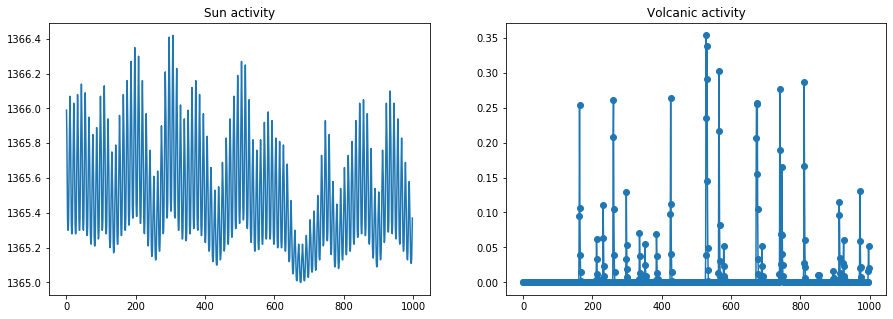

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].plot(SUN)
axes[0].set_title('Sun activity')
axes[1].plot(VUL, '-o')
axes[1].set_title('Volcanic activity')

## Temperature Data

In [10]:
# unpacking variables
R1 =  Dataset('data/T2m_R1_ym_1stMill.nc', 'r')
temperature = R1.variables['T2m'][:]
lat = R1.variables['lat'][:]
lon = R1.variables['lon'][:]

In [70]:
global_temp = np.mean(temperature)
std_temp = np.std(temperature)

In [43]:
temperature_norm = (temperature - global_temp) / std_temp

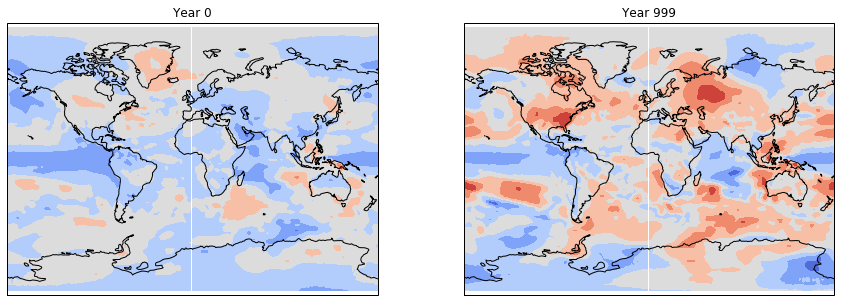

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), subplot_kw={'projection': ccrs.Miller()})
for kk in [0, 1]:
    axes[kk].set_global()
    axes[kk].coastlines()

axes[0].contourf(lon, lat, temperature_norm[0], transform=ccrs.PlateCarree(), cmap='coolwarm')  # didn't use transform, but looks ok...
axes[0].set_title('Year 0')

axes[1].contourf(lon, lat, temperature_norm[-1], transform=ccrs.PlateCarree(), cmap='coolwarm')  # didn't use transform, but looks ok...
axes[1].set_title('Year 999')

plt.show()

## Find Vulcanic peak events

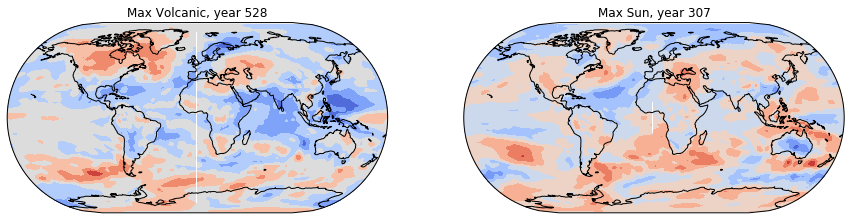

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), subplot_kw={'projection': ccrs.EckertIII()})
for kk in [0, 1]:
    axes[kk].set_global()
    axes[kk].coastlines()

axes[0].contourf(lon, lat, temperature_norm[np.argmax(VUL)],transform=ccrs.PlateCarree(), cmap='coolwarm')  # didn't use transform, but looks ok...
axes[0].set_title(f'Max Volcanic, year {np.argmax(VUL)}')

axes[1].contourf(lon, lat, temperature_norm[np.argmax(SUN)],transform=ccrs.PlateCarree(), cmap='coolwarm')  # didn't use transform, but looks ok...
axes[1].set_title(f'Max Sun, year {np.argmax(SUN)}')

plt.show()

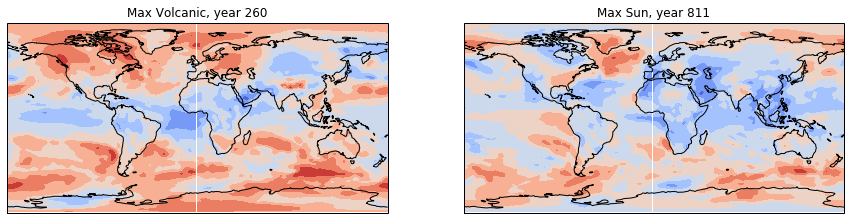

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), subplot_kw={'projection': ccrs.PlateCarree()})
for kk in [0, 1]:
    axes[kk].set_global()
    axes[kk].coastlines()

axes[0].contourf(lon, lat, temperature_norm[260], cmap='coolwarm')  # didn't use transform, but looks ok...
axes[0].set_title(f'Max Volcanic, year {260}')

axes[1].contourf(lon, lat, temperature_norm[811], cmap='coolwarm')  # didn't use transform, but looks ok...
axes[1].set_title(f'Max Sun, year {811}')

plt.show()